### Initial set-up

In [1]:
import folium
import pandas as pd
import numpy as np
import re

### How folium works
The workflow is basically you create a map object. 
You import your data and organise them with a feature group that you insert into the map.

In [2]:
%cd "F:\Google Drive\JupyterNotebooks\PMega\Section 11 - Webmaps"
import os
os.listdir()

F:\Google Drive\JupyterNotebooks\PMega\Section 11 - Webmaps


['.~$Volcsmap.html.insyncdl',
 'Aus Volc.txt',
 'Aus Volc.xlsx',
 'code.py',
 'debug.txt',
 'debug_pop.txt',
 'desktop.ini',
 'GeoMap Project Polished.ipynb',
 'GeoMap Project.ipynb',
 'GVP_Volcano_List.xls',
 'GVP_Volcano_List.xlsx',
 'MyMap.html',
 'myvolcsmap.html',
 'out.txt',
 'popmap.html',
 'Popmap.ipynb',
 'subVolcs.html',
 'Testvolcsmap.html',
 'Volcanoes_USA.csv',
 'Volcanoes_USA.txt',
 'VolcanoMap.html',
 'Volcsmap.html',
 'VolcsTestMap.html',
 'world.json']

### Creating the map

In [3]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(folium.map.LegacyMap)
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must pass API key)
 |      - "Mapbox" (Must pass API key)
 |      - "CartoDB" (positron and dark_matter)
 |  
 |  You can pass a custom tileset to Folium by passing a Leaflet-style
 |  URL to the tiles parameter: ``http://{s}.yourtiles.com/{z}/{x}/{y}.png``
 |  
 |  Parameters
 |  ----------
 |  location: tuple or list, default None
 |      Latitude and Longitude of Map (Northing, Easting).
 |  width: pixel int or perc

### Creating a feature group

In [6]:
help(folium.FeatureGroup)

Help on class FeatureGroup in module folium.map:

class FeatureGroup(Layer)
 |  Create a FeatureGroup layer ; you can put things in it and handle them
 |  as a single layer.  For example, you can add a LayerControl to
 |  tick/untick the whole group.
 |  
 |  Parameters
 |  ----------
 |  name : str, default None
 |      The name of the featureGroup layer.
 |      It will be displayed in the LayerControl.
 |      If None get_name() will be called to get the technical (ugly) name.
 |  overlay : bool, default True
 |      Whether your layer will be an overlay (ticked with a check box in
 |      LayerControls) or a base layer (ticked with a radio button).
 |  
 |  Method resolution order:
 |      FeatureGroup
 |      Layer
 |      branca.element.MacroElement
 |      branca.element.Element
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name=None, overlay=True, control=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  -----

In [120]:
all_volcs = folium.FeatureGroup(name="All")

### Importing and cleaning the data

In [1]:
data_raw = pd.read_excel("GVP_Volcano_List.xlsx",header=1)
print("data_raw: "+str(data_raw.shape))
data = data_raw.dropna()
print("data: "+str(data.shape))
data.replace(to_replace="'",value=" ",regex= True, inplace=True)

NameError: name 'pd' is not defined

#data["Volcano Name"].replace(regex=True,inplace=True,to_replachel
data.reset_index(inplace = True)

#note: reindex is where you have your own index to insert. 

In [6]:
# This will do for now

data.replace(to_replace="'",value=" ",regex= True, inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [34]:
#debugging
with open("debug.txt","w+") as file:
    file.seek(0)
    for x in data["Volcano Name"]:
        file.write(str(x)+"\n")
    

In [7]:
lat = data["Latitude"]
lon = data["Longitude"]
elev = data["Elevation"]
name = data["Volcano Name"]
erupt = data["Last Eruption Year"]

In [210]:
erupt.head(5)

0      -6850
1    Unknown
2       1972
3      -2080
4        950
Name: Last Eruption Year, dtype: object

In [9]:
# checking that it has indeed removed the '
name.iloc[244:247]

2013         Chirpoi
2031       Chokaisan
2060    Ch uga-ryong
Name: Volcano Name, dtype: object

### Setting up the rest of the map

In [11]:
volcsmap = folium.Map(tiles="Mapbox Bright")
all_volcs = folium.FeatureGroup(name="All Volcanoes")

In [215]:
test = [1,"unknown"]
for i in test:
    try:
        print(float(i))
    except ValueError:
        print("gray")

1.0
gray


In [12]:
def color_gen(lastErupt):
    try:
        x = float(lastErupt)
    except ValueError:
        return("gray")
    
    if x > 1900:
        return("red")
    elif 1400<= x < 1900:
        return("lightred")
    elif 1100 <= x <1400:
        return("orange")
    elif 600 <= x < 1100:
        return("pink")
    elif 100 <= x < 600:
        return("green")
    elif -1000 <= x < 100:
        return("darkgreen")
    elif x < -1000:
        return("darkpurple")

# now we add that feature group to the map

#volcsmap.add_child(all_volcs)
# folium.LayerControl().add_to(volcsmap)
#volcsmap.save("volcsmap.html")


In [13]:
# gathering data on lat, lon, elev and name
for i,j,k,l,m in zip(lat,lon,elev,name,erupt):
    #add markers to the featuregroup: all_volcs. Note that Marker is an object, not a function.
    #all_volcs.add_child(folium.CircleMarker(location=[i,j],popup=l+", "+str(k),icon=folium.Icon(color=color_gen(m))))
    
    #circle markers
    all_volcs.add_child(folium.CircleMarker(location=[i,j],radius=6, popup=l+", "+str(k),colour="gray",fill = True, fill_color=color_gen(m), fill_opacity=0.7))

In [227]:
help(folium.CircleMarker)

Help on class CircleMarker in module folium.features:

class CircleMarker(folium.map.Marker)
 |  Creates a CircleMarker object for plotting on a Map.
 |  
 |  Parameters
 |  ----------
 |  location: tuple or list
 |      Latitude and Longitude of Marker (Northing, Easting)
 |  radius: int
 |      The radius of the circle in pixels.
 |      For setting the radius in meter, use Circle.
 |  color: str, default '#3388ff'
 |      The color of the marker's edge in a HTML-compatible format.
 |  fill: bool, default False
 |      If true the circle will be filled.
 |  fill_color: str, default to the same as color
 |      The fill color of the marker in a HTML-compatible format.
 |  fill_opacity: float, default 0.2
 |      The fill opacity of the marker, between 0. and 1.
 |  popup: string or folium.Popup, default None
 |      Input text or visualization for object.
 |  
 |  See http://leafletjs.com/reference-1.2.0.html#path for more otions.
 |  
 |  Method resolution order:
 |      CircleMarker

In [225]:
dir(folium)

['Circle',
 'CircleMarker',
 'ClickForMarker',
 'ColorMap',
 'CssLink',
 'CustomIcon',
 'Div',
 'DivIcon',
 'Element',
 'FeatureGroup',
 'Figure',
 'FitBounds',
 'GeoJson',
 'Html',
 'IFrame',
 'Icon',
 'JavascriptLink',
 'LatLngPopup',
 'LayerControl',
 'LinearColormap',
 'Link',
 'MacroElement',
 'Map',
 'Marker',
 'PolyLine',
 'Popup',
 'RegularPolygonMarker',
 'StepColormap',
 'TileLayer',
 'TopoJson',
 'Vega',
 'VegaLite',
 'WmsTileLayer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'absolute_import',
 'division',
 'features',
 'folium',
 'map',
 'print_function',
 'utilities']

In [235]:
help(folium.LayerControl)

Help on class LayerControl in module folium.map:

class LayerControl(branca.element.MacroElement)
 |  Creates a LayerControl object to be added on a folium map.
 |  
 |  Parameters
 |  ----------
 |  position : str
 |        The position of the control (one of the map corners), can be
 |        'topleft', 'topright', 'bottomleft' or 'bottomright'
 |        default: 'topright'
 |  collapsed : boolean
 |        If true the control will be collapsed into an icon and expanded on
 |        mouse hover or touch.
 |        default: True
 |  autoZIndex : boolean
 |        If true the control assigns zIndexes in increasing order to all of
 |        its layers so that the order is preserved when switching them on/off.
 |        default: True
 |  
 |  Method resolution order:
 |      LayerControl
 |      branca.element.MacroElement
 |      branca.element.Element
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, position='topright', collapsed=True, autoZIndex=True)
 | 

### Adding another layer

In [14]:
subVolcs = folium.Map(tiles="Mapbox Bright")

In [15]:
# prep the data. I'm grabbing all the data points with an elevation of less than zero
sub_volcs = data.loc[data["Elevation"]<0]
sub_lat = sub_volcs["Latitude"]
sub_lon = sub_volcs["Longitude"]
sub_elev = sub_volcs["Elevation"]
sub_name = sub_volcs["Volcano Name"]

In [16]:
# create a new FeatureGroup object
sub_volcs = folium.FeatureGroup(name="Submerged Volcanoes")

for i,j,k,l in zip(sub_lat,sub_lon,sub_name,sub_elev):
    sub_volcs.add_child(folium.Marker(location=[i,j],popup=k+", "+str(l),icon=folium.Icon(color="darkpurple")))

In [124]:
# now we add the feature group to the map volcsmap
subVolcs.add_child(sub_volcs)
folium.LayerControl().add_to(subVolcs)

In [17]:


volcsmap.add_child(sub_volcs)
volcsmap.add_child(all_volcs)

folium.LayerControl().add_to(volcsmap)
volcsmap.save("Testvolcsmap.html")

In [151]:
data.columns

Index(['index', 'Volcano Number', 'Volcano Name', 'Primary Volcano Type',
       'Last Eruption Year', 'Country', 'Region', 'Subregion', 'Latitude',
       'Longitude', 'Elevation', 'Tectonic Settings', 'Evidence Category',
       'Major Rock 1', 'Major Rock 2', 'Major Rock 3', 'Major Rock 4',
       'Major Rock 5', 'Minor Rock 1', 'Minor Rock 2', 'Minor Rock 3',
       'Minor Rock 4', 'Minor Rock 5', 'Population within 5 km',
       'Population within 10 km', 'Population within 30 km',
       'Population within 100 km'],
      dtype='object')

In [136]:
import seaborn as sns

In [182]:
data["Last Eruption Year"].head(5)

0      -6850
1    Unknown
2       1972
3      -2080
4        950
Name: Last Eruption Year, dtype: object

In [183]:
time_data = pd.Series(data["Last Eruption Year"].convert_objects(convert_numeric=True).dropna())

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [184]:
time_data.head(5)

0   -6850.0
2    1972.0
3   -2080.0
4     950.0
5     -50.0
Name: Last Eruption Year, dtype: float64

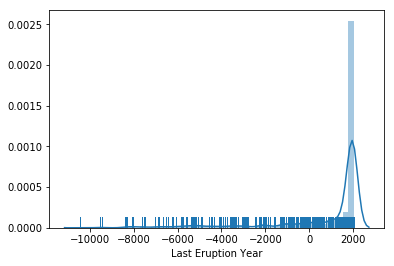

In [187]:
import matplotlib
%matplotlib inline
sns.distplot(time_data, kde=True, rug=True)